In [ ]:
!pip install fastbook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 26.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [68]:
#hide
import fastbook
fastbook.setup_book()

# Zadanie minimum

Wykorzystamy przykład z [fastbook](https://github.com/fastai/fastbook/blob/master/02_production.ipynb):

In [69]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [70]:
path = Path('//content/gdrive/MyDrive/archive')

In [71]:
loko = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [72]:
#hide
dls = loko.dataloaders(path)

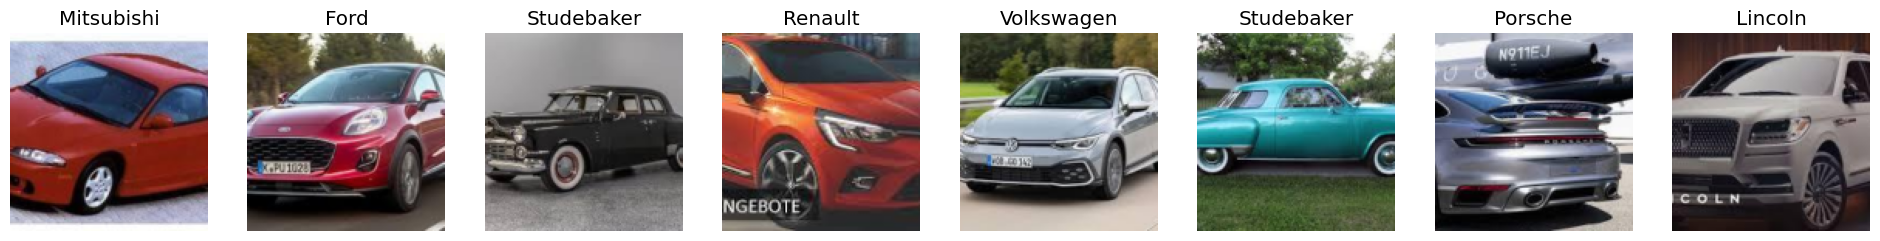

In [73]:
dls.valid.show_batch(max_n=8, nrows=1)

### Przygotowanie danych

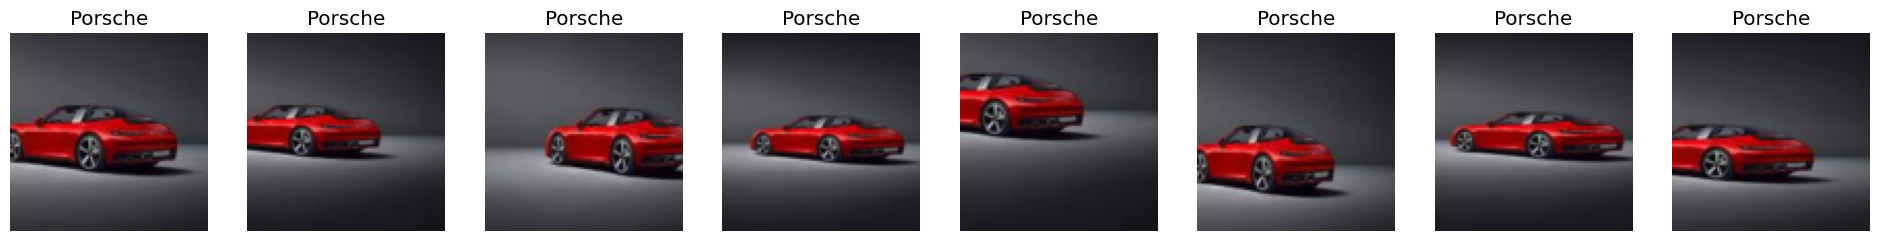

In [74]:
loko = loko.new(item_tfms=RandomResizedCrop(96, min_scale=0.1))
dls = loko.dataloaders(path, bs=20)
dls.train.show_batch(max_n=8, nrows=1, unique=True)

### Data Augmentation

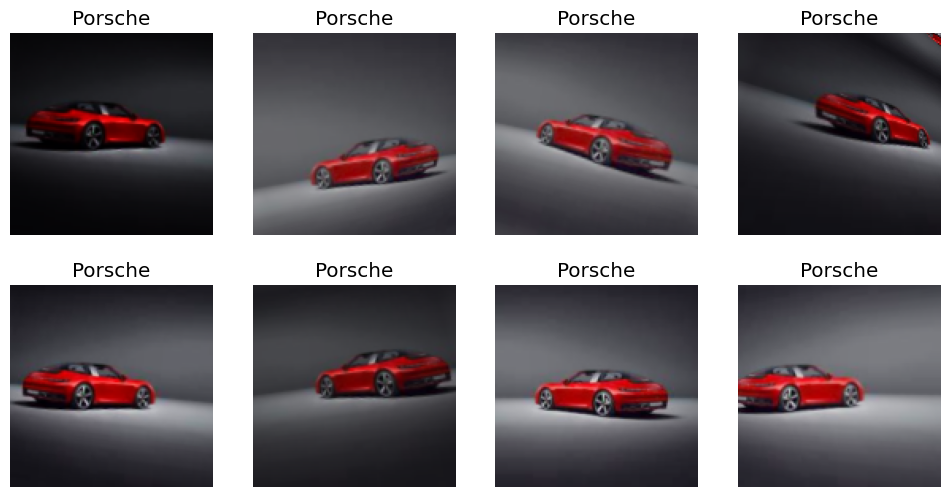

In [75]:
#hide
loko = loko.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=1.5))
dls = loko.dataloaders(path, bs=25)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

### Trenowanie

Wykorzystamy istniejący model [rosnet18](https://fastai1.fast.ai/vision.models.html).

In [76]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5) # można poeksperymentować

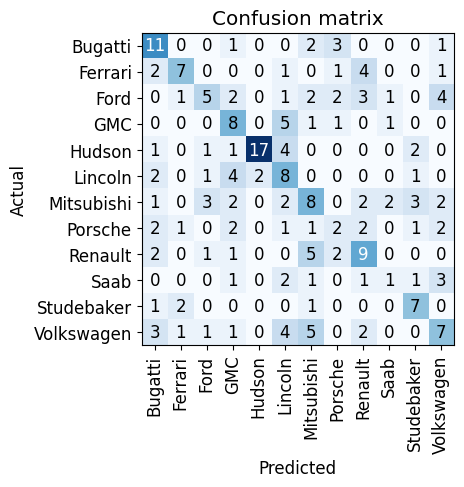

In [77]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

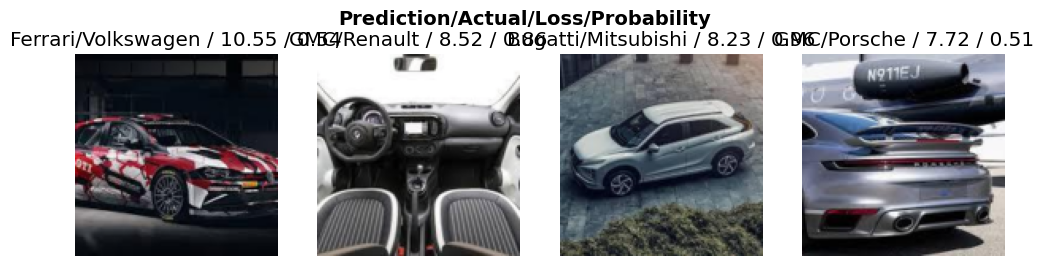

In [79]:
interp.plot_top_losses(4, nrows=1)

In [80]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [81]:
learn.export() # Eksport przetrenowanego modelu (może się przydać przy użytku w innym projekcie)

In [82]:
path = Path()
learn_inf = load_learner(path/'export.pkl') # import zapisanego wyżej modelu (tak dla zasady)

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


In [84]:
out_pl = widgets.Output()
out_pl.clear_output()
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/archive/imgs_zip/imgs/Bugatti/Bugatti_000.jpg'])
img = PILImage.create(btn_upload.data[-1])
with out_pl: display(img.to_thumb(256,256))
btn_run = widgets.Button(description='Classify')
lbl_pred = widgets.Label()
lbl_pred.value = ""

def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

def on_upload_change(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(256,256))

btn_run.on_click(on_click_classify)
btn_upload = widgets.FileUpload()
btn_upload.observe(on_upload_change, names='_counter')
VBox([widgets.Label("Let's find out how it works!"), btn_upload, btn_run, out_pl, lbl_pred])

IndexError: list index out of range

IndexError: list index out of range

#Prownanie fine tune vs manual freeze

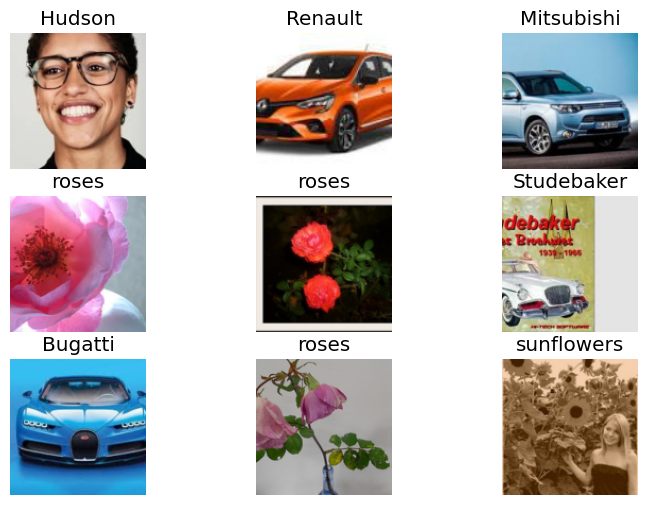

In [87]:
car_data = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

dls = car_data.dataloaders(path, bs=32)
dls.show_batch(max_n=9, figsize=(9,6))


In [88]:
# finetune_5
learn1 = cnn_learner(dls, resnet18, metrics=accuracy)
learn1.fine_tune(5)


/usr/local/lib/python3.11/dist-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [89]:
# manual (freeze/unfreeze)
learn2 = cnn_learner(dls, resnet18, metrics=accuracy)

learn2.freeze()
learn2.fit_one_cycle(1, lr_max=3e-3)

learn2.unfreeze()
learn2.fit_one_cycle(4, lr_max=slice(1e-6,1e-4))


Strata – fine_tune:
Strata – ręczne freeze/unfreeze:


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

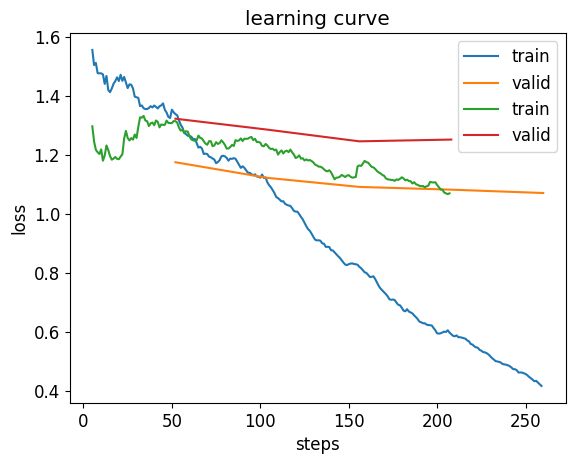

In [90]:
# porowanie
print("Strata – fine_tune:")
learn1.recorder.plot_loss()

print("Strata – ręczne freeze/unfreeze:")
learn2.recorder.plot_loss()


In [91]:
#porównanie dokładności
acc1 = learn1.validate()[1]
acc2 = learn2.validate()[1]

print(f" Dokładność fine_tune: {acc1:.4f}")
print(f" Dokładność freeze/unfreeze: {acc2:.4f}")


 Dokładność fine_tune: 0.6819
 Dokładność freeze/unfreeze: 0.6169


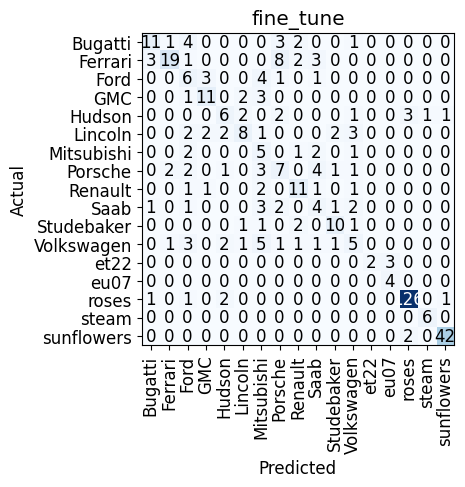

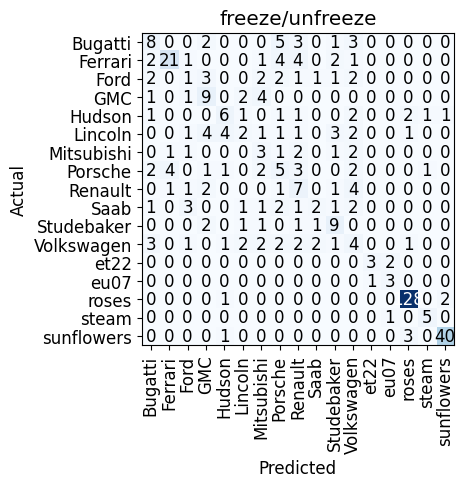

In [92]:
# macierze pomyłek (opcjonalnie)
interp1 = ClassificationInterpretation.from_learner(learn1)
interp1.plot_confusion_matrix(title='fine_tune')

interp2 = ClassificationInterpretation.from_learner(learn2)
interp2.plot_confusion_matrix(title='freeze/unfreeze')
